## Elower grid error

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tqdm
from exojax.spec.lbderror import single_tilde_line_strength_zeroth
from exojax.spec.lbderror import worst_tilde_line_strength_first
from exojax.spec.lbderror import worst_tilde_line_strength_second


In [2]:
N=1000
Ttyparr = np.logspace(np.log10(100.1),np.log10(2000.1),N)
Tarr = np.logspace(np.log10(100.), np.log10(3000.), N)

Tref=500.
dE_0th=500.
dE_1st=1000.
dE_2nd=1500.

arr0=[]
arr1 = []
arr2 = []
for ttyp in tqdm.tqdm(Ttyparr):
    x = single_tilde_line_strength_zeroth(1./Tarr, 1.0/ttyp, 1.0/Tref, dE_0th)
    arr0.append(x)
    x = worst_tilde_line_strength_first(Tarr, ttyp, Tref, dE_1st)
    arr1.append(x)
    x = worst_tilde_line_strength_second(Tarr, ttyp, Tref, dE_2nd)
    arr2.append(x)

arr0 = np.array(arr0).reshape(N, N)
arr1 = np.array(arr1).reshape(N, N)
arr2 = np.array(arr2).reshape(N, N)


100%|██████████| 1000/1000 [02:29<00:00,  6.70it/s]


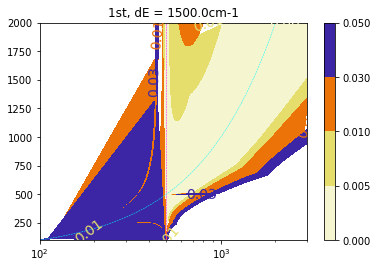

In [3]:

#plt.imshow(arr,cmap="bwr")
co=plt.contourf(Tarr, Ttyparr, arr2, levels=[0.0, 0.005,0.01,0.03,0.05],cmap="CMRmap_r")
co.clabel(fmt='%1.2f', fontsize=14)
plt.axvline(Tref,color="magenta",lw=0.5, ls="dashed")
#plt.axhline(1000)
plt.plot(Ttyparr,Ttyparr,color="cyan",lw=0.5, ls="dashed")
plt.title("1st, dE = "+str(dE_2nd)+"cm-1")
plt.colorbar(co)
plt.xscale("log")

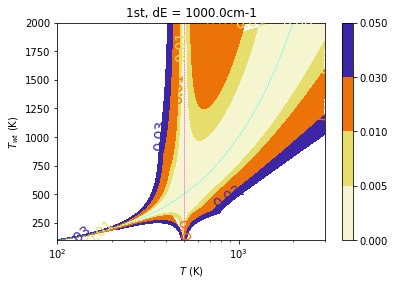

In [6]:

#plt.imshow(arr,cmap="bwr")
co=plt.contourf(Tarr, Ttyparr, arr1, levels=[0.0, 0.005,0.01,0.03,0.05],cmap="CMRmap_r")
co.clabel(fmt='%1.2f', fontsize=14)
plt.axvline(Tref,color="magenta",lw=0.5, ls="dashed")
#plt.axhline(1000)
plt.plot(Ttyparr,Ttyparr,color="cyan",lw=0.5, ls="dashed")
plt.title("1st, dE = "+str(dE_1st)+"cm-1")
plt.colorbar(co)
plt.ylabel("$T_{wt}$ (K)")
plt.xlabel("$T$ (K)")
plt.xscale("log")

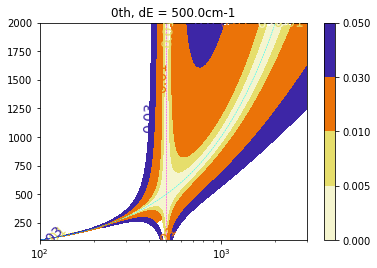

In [24]:
co=plt.contourf(Tarr, Ttyparr, np.abs(arr0), levels=[0.0, 0.005,0.01,0.03,0.05],cmap="CMRmap_r")
co.clabel(fmt='%1.2f', fontsize=14)
plt.axvline(Tref,color="magenta",lw=0.5, ls="dashed")
#plt.axhline(1000)
plt.plot(Ttyparr,Ttyparr,color="cyan",lw=0.5, ls="dashed")
plt.title("0th, dE = "+str(dE_0th)+"cm-1")
plt.colorbar(co)
plt.xscale("log")

In [13]:
N=1000
Ttyparr = np.logspace(np.log10(500.1),np.log10(2000.1),N)
Tarr = np.logspace(np.log10(100.), np.log10(4000.), N)

Tref=500.
dE_2nd=1500.

arr2 = []
for ttyp in tqdm.tqdm(Ttyparr):
    x = worst_tilde_line_strength_second(Tarr, ttyp, Tref, dE_2nd)
    arr2.append(x)

arr2 = np.array(arr2).reshape(N, N)


100%|██████████| 1000/1000 [01:44<00:00,  9.55it/s]


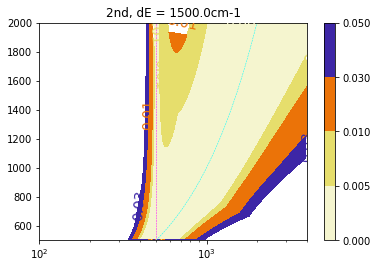

In [14]:
#plt.imshow(arr,cmap="bwr")
co=plt.contourf(Tarr, Ttyparr, arr2, levels=[0.0, 0.005,0.01,0.03,0.05],cmap="CMRmap_r")
co.clabel(fmt='%1.2f', fontsize=14)
plt.axvline(Tref,color="magenta",lw=0.5, ls="dashed")
#plt.axhline(1000)
plt.plot(Ttyparr,Ttyparr,color="cyan",lw=0.5, ls="dashed")
plt.title("2nd, dE = "+str(dE_2nd)+"cm-1")
plt.colorbar(co)
plt.xscale("log")

In [19]:
500/160.

3.125

In [18]:
650*3

1950